# Introduction

In this notebook, we will take a quick look at the "collider" effect.

Let's say we have the following causal graph:

$$a \rightarrow b \leftarrow c$$

Apparently, if we "condition" on $b$, then $a$ and $c$ will be correlated, even though they are independent.

In [1]:
import numpy as np
from custom import noise
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/ericmjl/anaconda/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericmjl/anaconda/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericmjl/anaconda/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericmjl/anaconda/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Generate Data

Let's assume we have a causal model that follows the equations below:

$$a \sim N(0, 1)$$
$$c \sim N(0, 1)$$
$$b = 5a + 5c$$

This is expressed in the code below.

In [24]:
size = 1000
a = noise(size)
c = noise(size)
b = 20*a - 20*c + noise(size)

We now make it into a pandas DataFrame.

In [25]:
df = pd.DataFrame({'a': a, 'b': b, 'c': c})

Let's view a pair plot to see the pairwise correlation (dependency) between the variables.

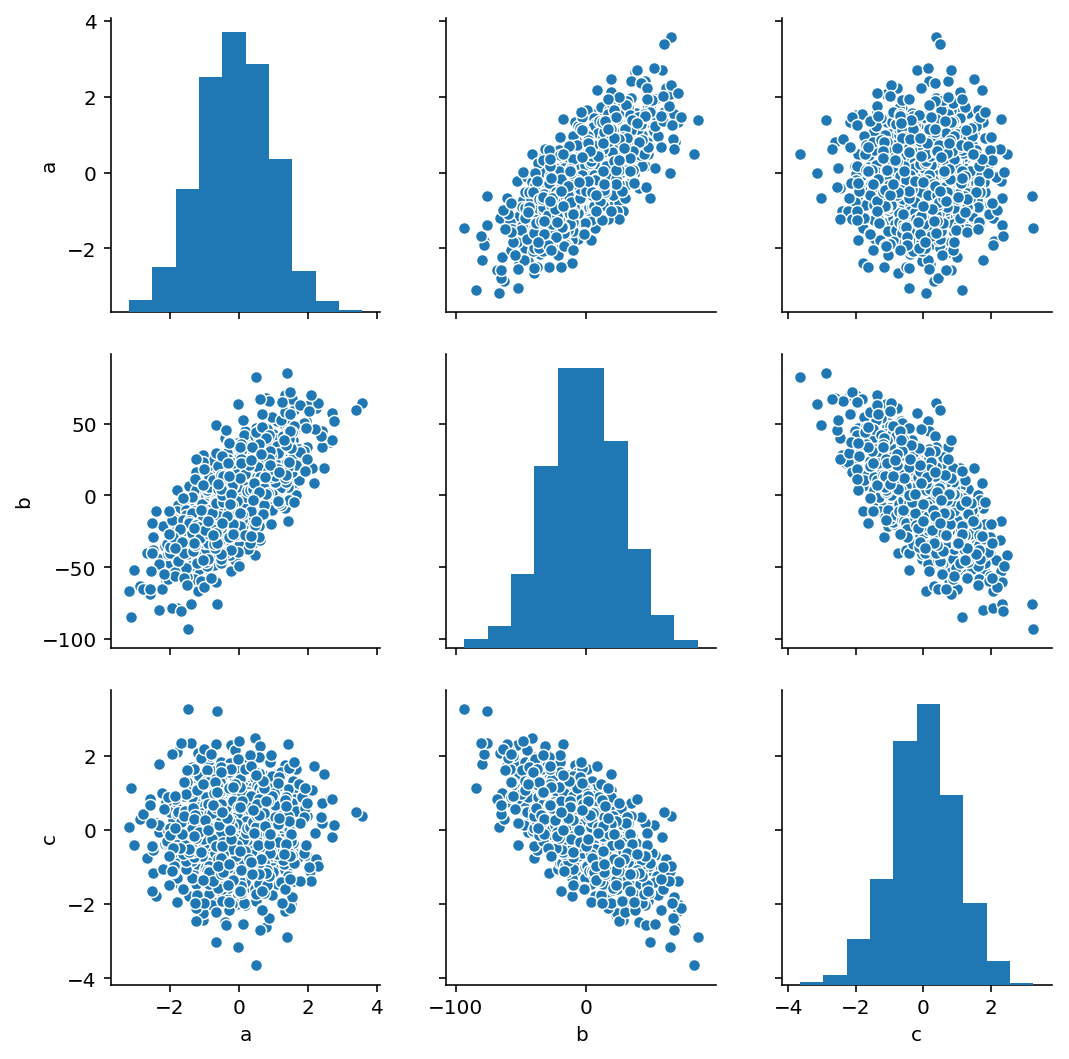

In [26]:
sns.pairplot(df)

Ok, as shown in the causal graph, $a$ and $c$ are independent of one another, and so distributionally, there's no trend between them.

# Conditioning

When we "condition" on a variable, remember that we are essentially taking a "slice" of a variable, and seeing what the distributions for the other variables are. I illustrated this on [my blog](https://ericmjl.github.io/blog/2018/8/7/joint-conditional-and-marginal-probability-distributions/).

In our problem, this means that we have to slice out a range of the values of $b$:

In [27]:
df_new = df[(df['b'] < df['b'].mean()) & (df['b'] > np.percentile(df['b'], 25))]

Now, let's visualize the relationship between $a$ and $c$, now conditioned on $b$.

Text(0.5,1,'conditioned on b')

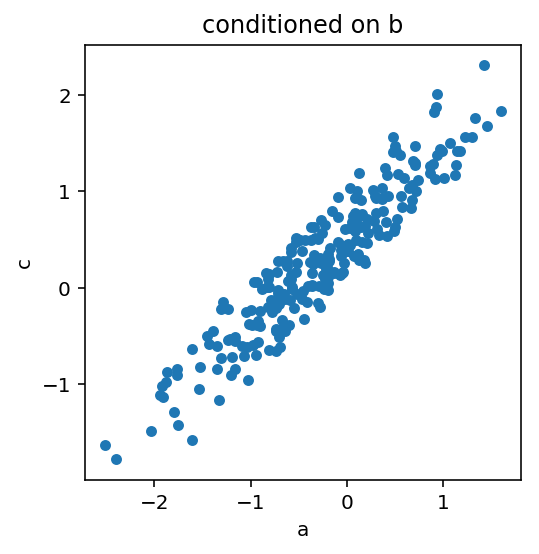

In [28]:
ax = df_new.plot(kind='scatter', x='a', y='c')
ax.set_aspect('equal')
ax.set_title('conditioned on b')

We can also look at the full joint distribution of $a$ and $c$, colouring $b$ to illustrate what would happen if we conditioned on particular values of $b$.

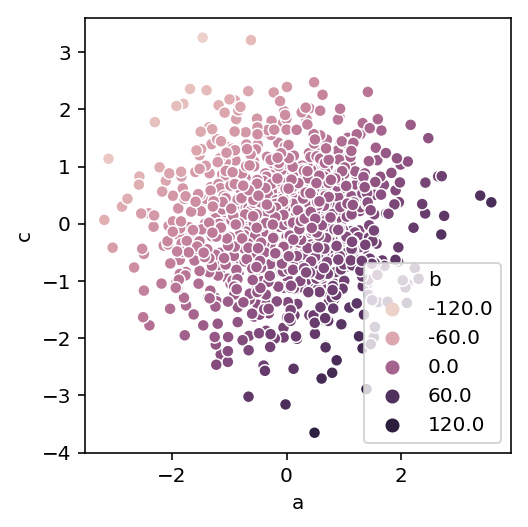

In [29]:
ax = sns.scatterplot(data=df, x='a', y='c', hue='b')
ax.set_aspect('equal')

# Conclusion

Here, we see that in a collider situation, if we condition on the child variable, the parents will be unduly correlated.